# Taller 1 - Regresiones
## Autor: Ruben Romero y Carlos A. Talero J
### Fecha: 25 de febrero de 2024
#### Descripción: Caracterización de vinos
##### Programa: Maestría de Inteligencia Artificial
##### Universidad: Pontificia Universidad Javeriana
##### Ciudad: Bogotá, D.C., Colombia
##### Profesor: Ing. Andres Dario Moreno Barbosa
##### Materia: Aprendizaje de Máquina


In [286]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
data = pd.read_csv('/Users/carlosalbertotalerojacome/Documents/M-IA/Javeriana/2do_semestre/ML/talleres/taller_1_vino/db/winequality-red.csv', sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Analisis de datos

Shape of data

In [287]:
# Shape (dimensiones) del DataFrame (1338 rows and 7 columns)
data.shape

(1599, 12)

Data types

In [288]:
# tipos de datos de las columnas
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Descriptiva

In [289]:
data_descrirtion=data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality' ]].describe()
data_descrirtion

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


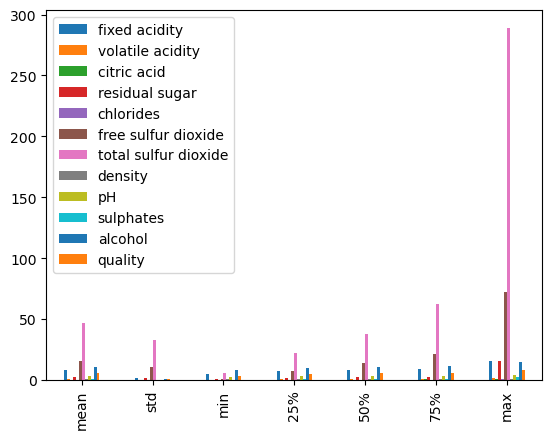

In [290]:

data_descrirtion.drop('count', axis=0).plot(kind='bar')
plt.show()


Histogramas de variables

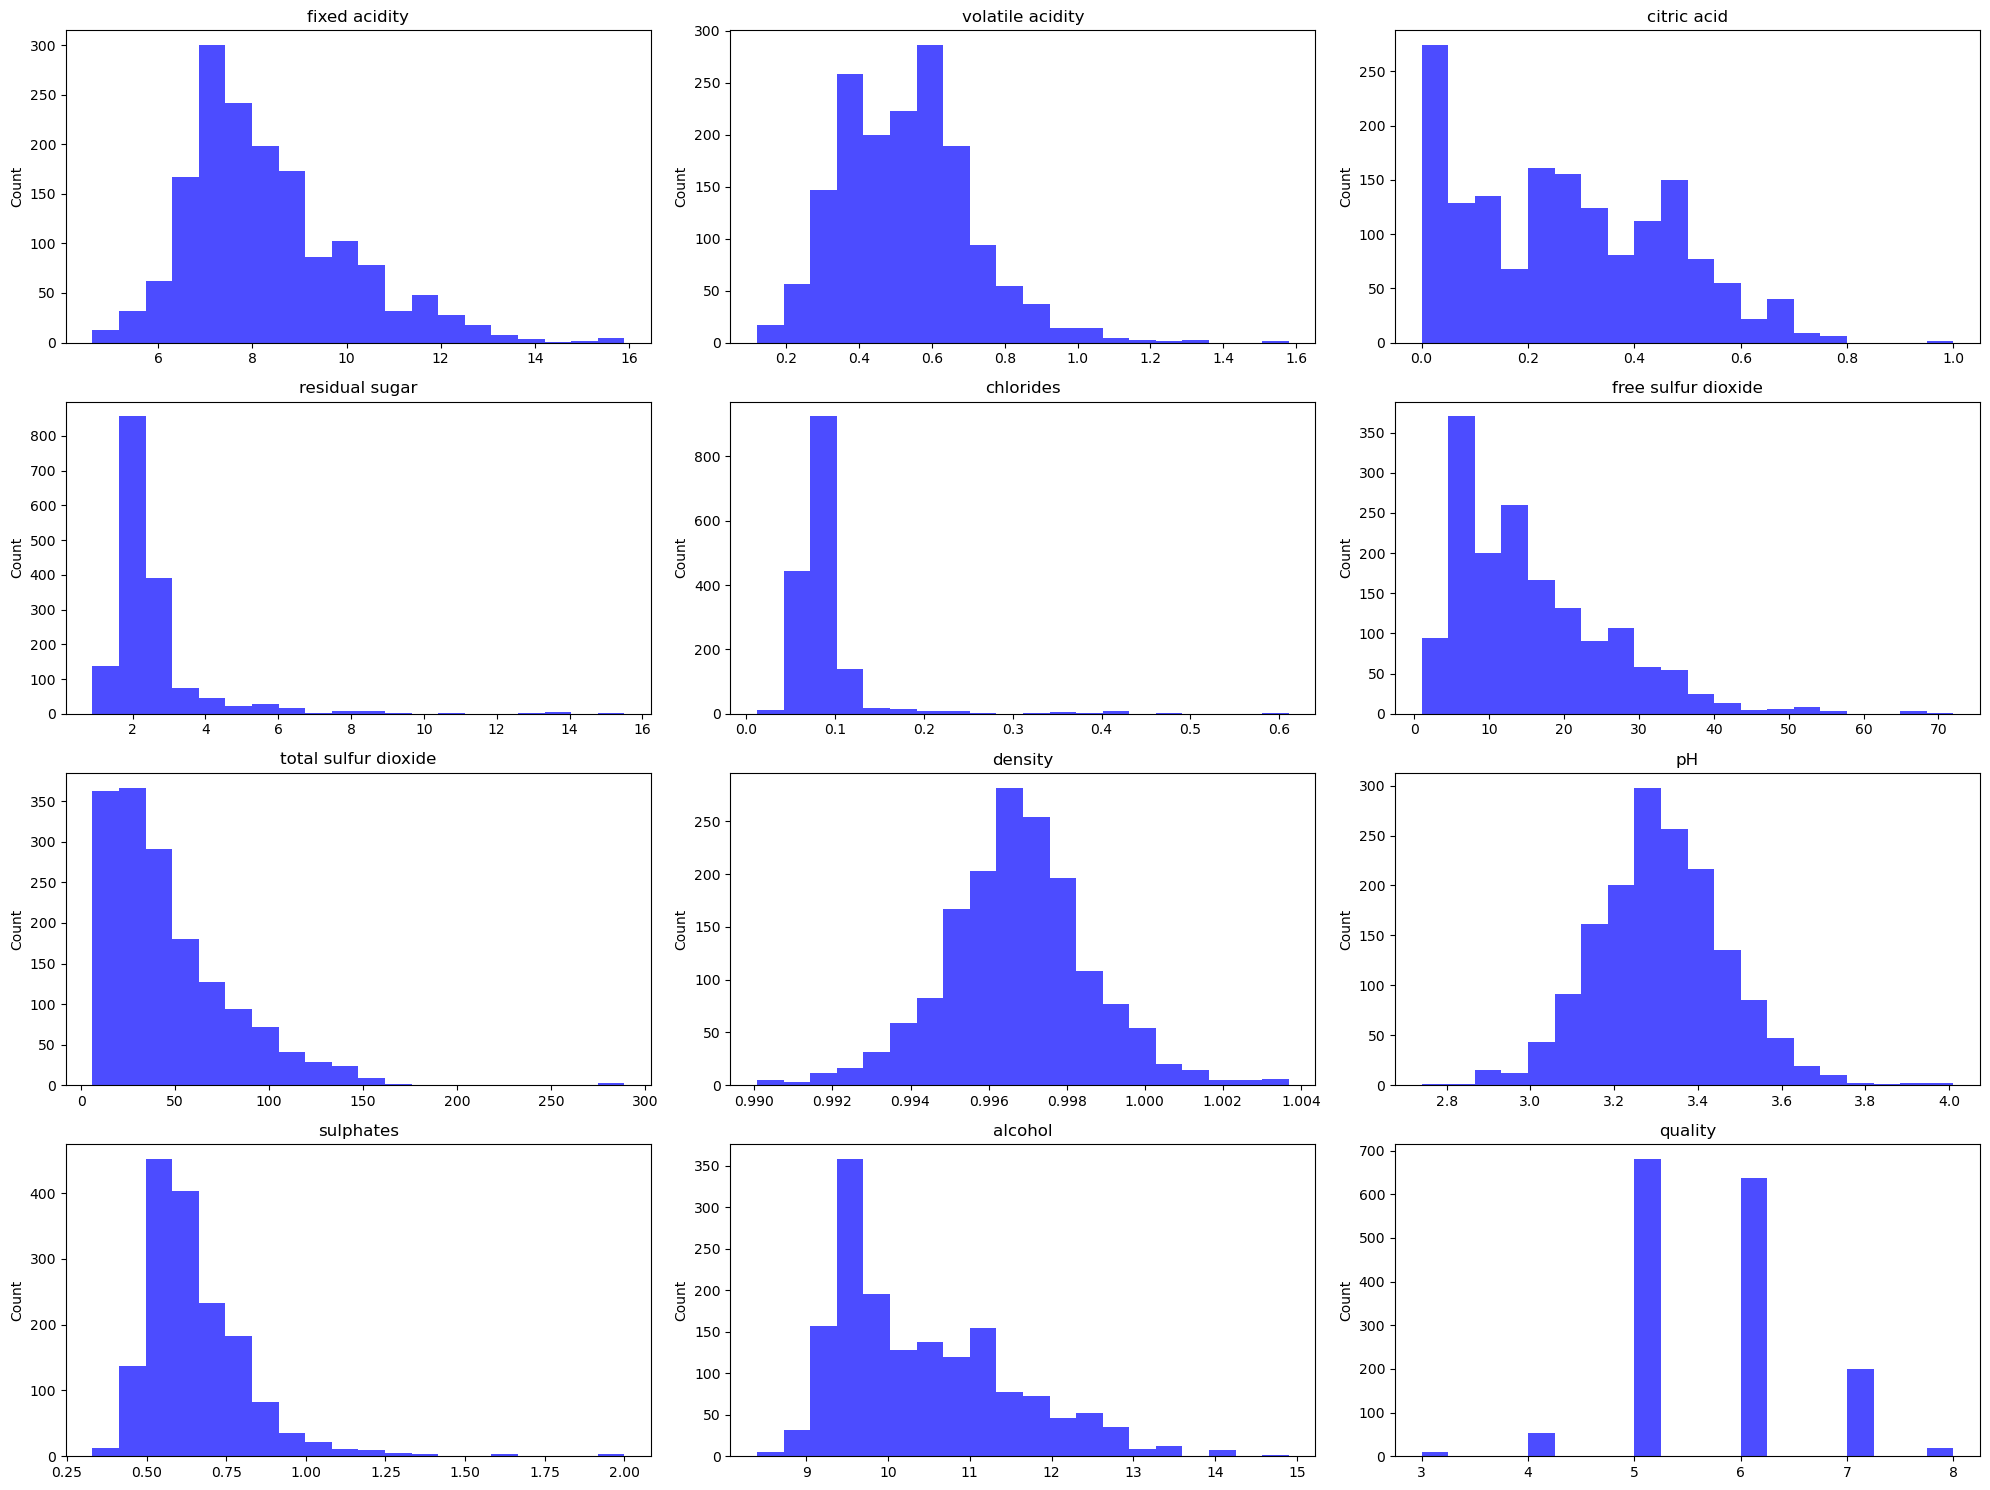

In [291]:
# Crear histogramas para cada variable en el DataFrame
plt.figure(figsize=(20, 15))
for i, col in enumerate(data.columns):
    plt.subplot(4, 3, i + 1)  # Asegura una cuadrícula de 4x3 para 12 variables
    data[col].hist(bins=20, color='blue', alpha=0.7)
    plt.title(col)
    plt.ylabel('Count')
    plt.grid(False)  # Desactiva la cuadrícula para una visualización más limpia
plt.tight_layout()  # Ajusta automáticamente los subgráficos para que quepan en el área de la figura
plt.show()


Matriz de correlación de variables


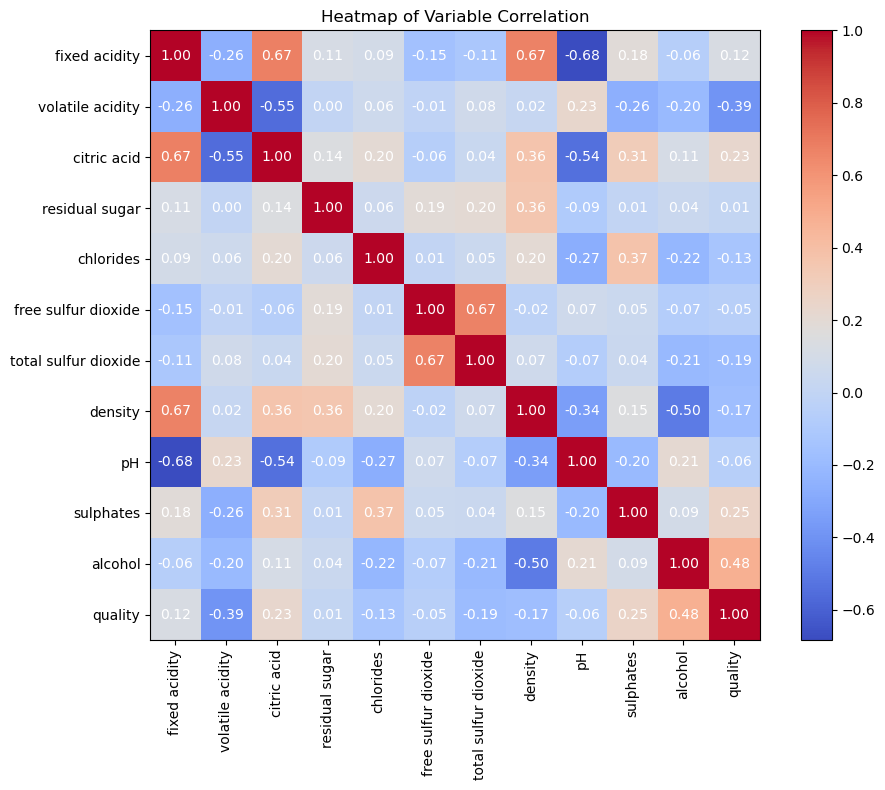

In [292]:
# Crear un diagrama de calor
plt.figure(figsize=(10, 8))

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Crear el mapa de calor utilizando plt.imshow
plt.imshow(correlation_matrix, interpolation='nearest', cmap='coolwarm')
plt.colorbar()

# Añadir marcas (ticks) y etiquetas
ticks = np.arange(len(correlation_matrix.columns))
plt.xticks(ticks, correlation_matrix.columns, rotation=90)
plt.yticks(ticks, correlation_matrix.columns)

# Añadir valores de correlación a cada celda del mapa
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="w")

plt.title('Heatmap of Variable Correlation')
plt.tight_layout()  # Ajusta la disposición para evitar la superposición de etiquetas
plt.show()


## Procesamiento de data

Transformación de variables sesgadas: "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide"

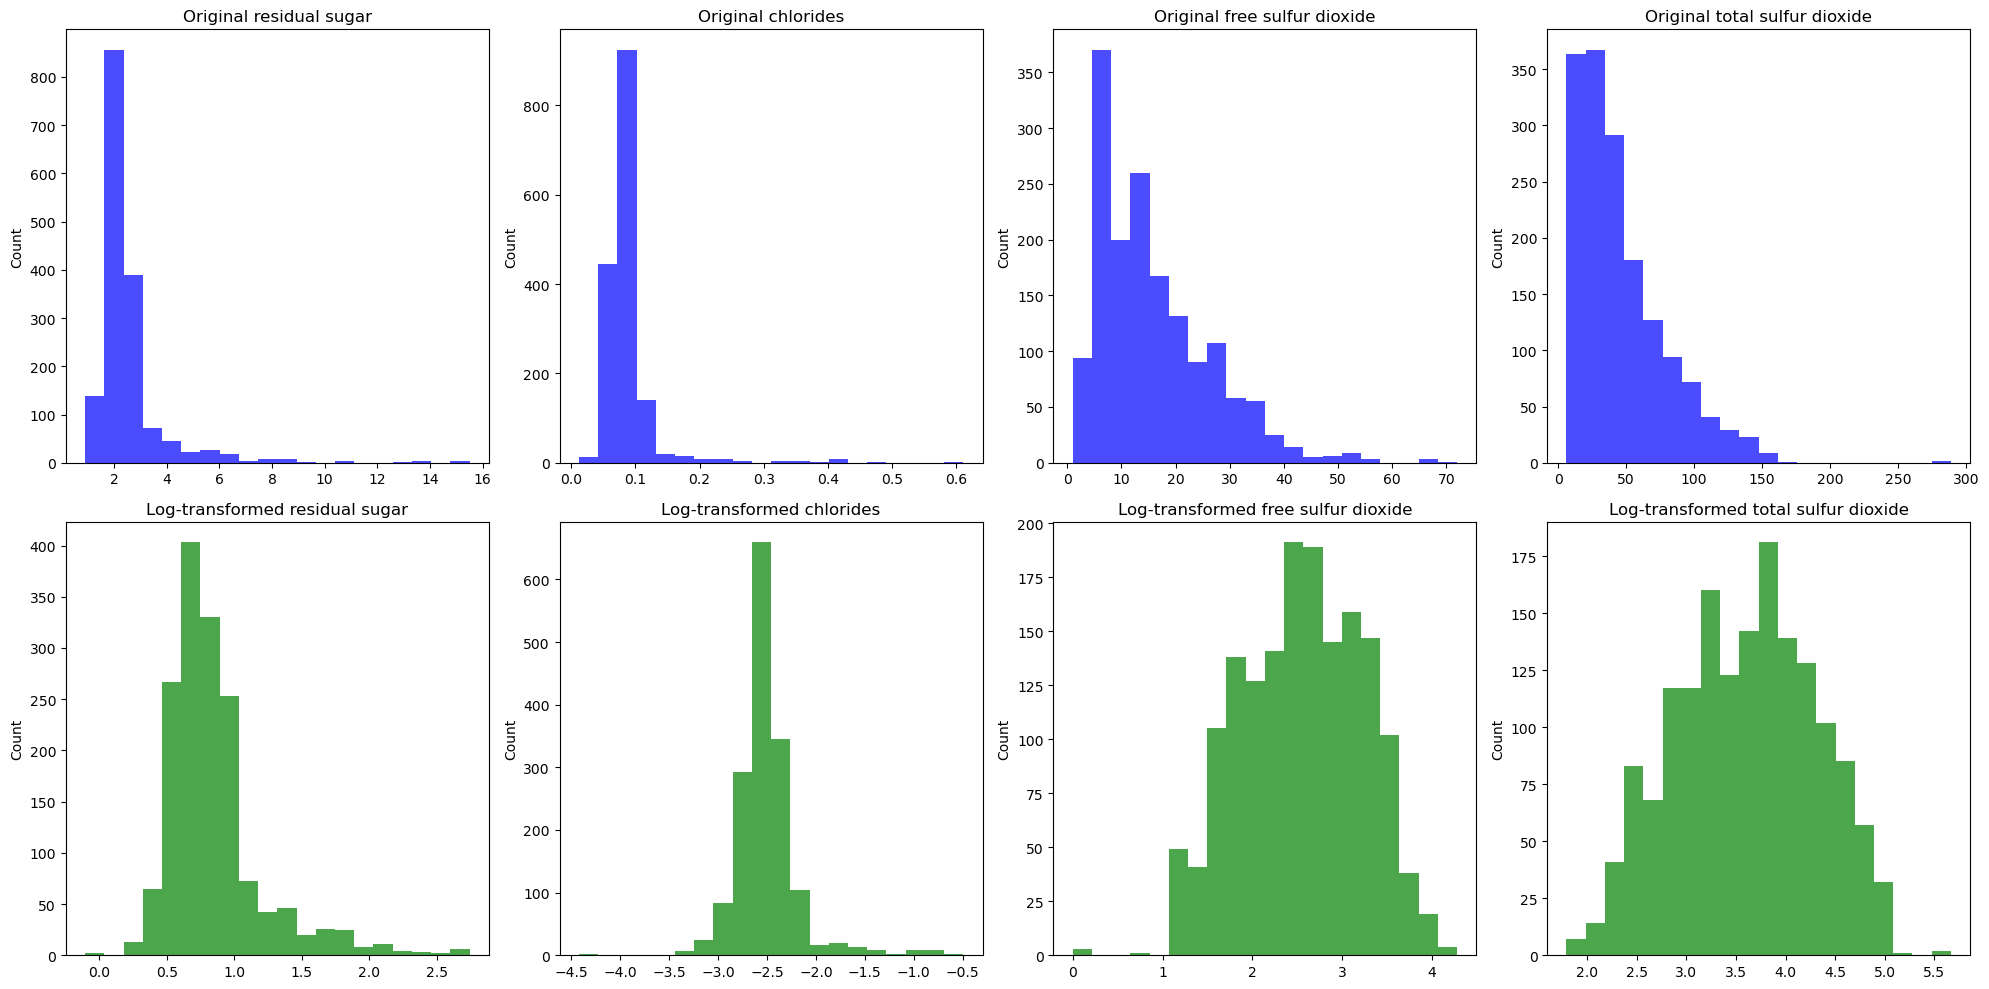

In [293]:
# Apply log transformation
df_transformed_sample = data.copy()
variables_to_transform = ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide']
for var in variables_to_transform:
    df_transformed_sample[var] = np.log(df_transformed_sample[var])

# Plot original and transformed distributions
plt.figure(figsize=(20, 10))

# Original distributions
for i, var in enumerate(variables_to_transform):
    plt.subplot(2, 4, i + 1)
    data[var].hist(bins=20, color='blue', alpha=0.7)
    plt.title(f'Original {var}')
    plt.ylabel('Count')
    plt.grid(False)

# Transformed distributions
for i, var in enumerate(variables_to_transform):
    plt.subplot(2, 4, i + 5)
    df_transformed_sample[var].hist(bins=20, color='green', alpha=0.7)
    plt.title(f'Log-transformed {var}')
    plt.ylabel('Count')
    plt.grid(False)

plt.tight_layout()
plt.show()

Identificacion y posible eliminación de outliers

In [294]:
# Initialize dictionaries to hold outlier bounds and count information
outliers_info = {}
outliers_count = {}

# Apply IQR method to identify outliers for each variable
for var in data.keys():
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Determine outliers
    outliers = data[(data[var] < lower_bound) | (data[var] > upper_bound)]
    outliers_info[var] = (lower_bound, upper_bound)
    outliers_count[var] = outliers.shape[0]

outliers_info, outliers_count

({'fixed acidity': (3.95, 12.349999999999998),
  'volatile acidity': (0.015000000000000013, 1.0150000000000001),
  'citric acid': (-0.4049999999999999, 0.9149999999999999),
  'residual sugar': (0.8499999999999996, 3.6500000000000004),
  'chlorides': (0.04000000000000002, 0.11999999999999998),
  'free sulfur dioxide': (-14.0, 42.0),
  'total sulfur dioxide': (-38.0, 122.0),
  'density': (0.9922475000000001, 1.0011875),
  'pH': (2.925, 3.6849999999999996),
  'sulphates': (0.28000000000000014, 0.9999999999999999),
  'alcohol': (7.1000000000000005, 13.5),
  'quality': (3.5, 7.5)},
 {'fixed acidity': 49,
  'volatile acidity': 19,
  'citric acid': 1,
  'residual sugar': 155,
  'chlorides': 112,
  'free sulfur dioxide': 30,
  'total sulfur dioxide': 55,
  'density': 45,
  'pH': 35,
  'sulphates': 59,
  'alcohol': 13,
  'quality': 28})

Normalización

In [295]:
# Normalizar las variables del conjunto de datos
data_normalized = data.copy()  # Crear una copia para la normalización

for var in data_normalized.columns:
    min_value = data_normalized[var].min()
    max_value = data_normalized[var].max()
    data_normalized[var] = (data_normalized[var] - min_value) / (max_value - min_value)

# Mostrar las primeras filas del conjunto de datos normalizado para verificar
data_normalized.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Regresion lineal

Funciones principales

In [296]:
# MSE
def calculate_mse(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = y_pred - y
    mse = (1/(2*m)) * np.sum(error**2)
    return mse

# Gradiente descendente
def gradient_descent(X, y, theta, learning_rate, iterations, threshold):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.dot(X.transpose(), (predictions - y))
        theta -= learning_rate * (1/m) * errors
        cost_history[i] = calculate_mse(X, y, theta)
        if i > 0 and abs(cost_history[i] - cost_history[i-1]) < threshold:
            print(f"Convergencia alcanzada en la iteración {i}.")
            break
    return theta, cost_history[:i+1]  # Devuelve theta y el historial de costo hasta la convergencia.

# Preparación de datos
def prepare_data(df, feature_names, label_name):
    # Selecciona múltiples columnas de características basadas en feature_names
    X = df[feature_names].values
    # Infla X con una columna de unos al inicio para el término de intercepción
    X_c = np.hstack((np.ones((X.shape[0], 1)), X))
    # Aplica logaritmo natural a la variable dependiente
    Y = df[[label_name]].values
    # logaritmo natural para charges
    # Y = np.log(Y)
    # Retorna el diccionario con las matrices X y Y preparadas
    return {'X': X_c, 'Y': Y}

Variable objetivo y variable independientes

In [297]:
feature_names = ['alcohol', 'volatile acidity',]
label_name = 'quality'

Separacion de datos para las fases de entrenamiento, validación y prueba

In [298]:
# Uso 70% para entrenamiento (random split)
train_df= data.sample(frac=0.7,random_state=200)
rest_df= data.drop(train_df.index)
# Uso 15% para validacion y 15% para test
val_df=rest_df.sample(frac=0.5,random_state=200)
test_df=rest_df.drop(val_df.index)

In [299]:
# Preparar los datos de entrenamiento, validación y prueba
train_data = prepare_data(train_df, feature_names, label_name)
val_data = prepare_data(val_df, feature_names, label_name)
test_data = prepare_data(test_df, feature_names, label_name)

Entrenamiento

Convergencia alcanzada en la iteración 55.


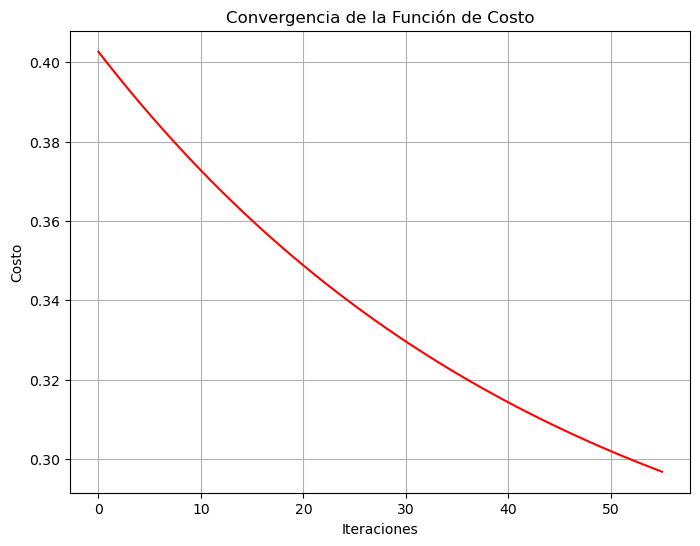

MSE en entrenamiento: 0.29684130117180046
MSE en validación: 0.3443323168696955
MSE en prueba: 0.34147599984109706


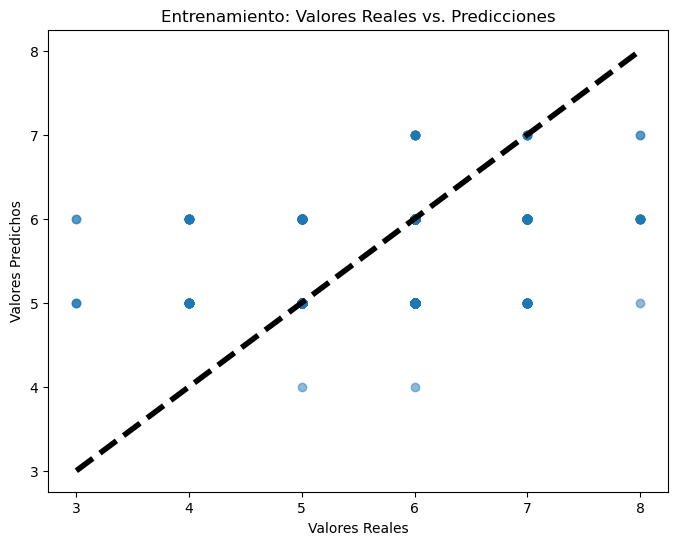

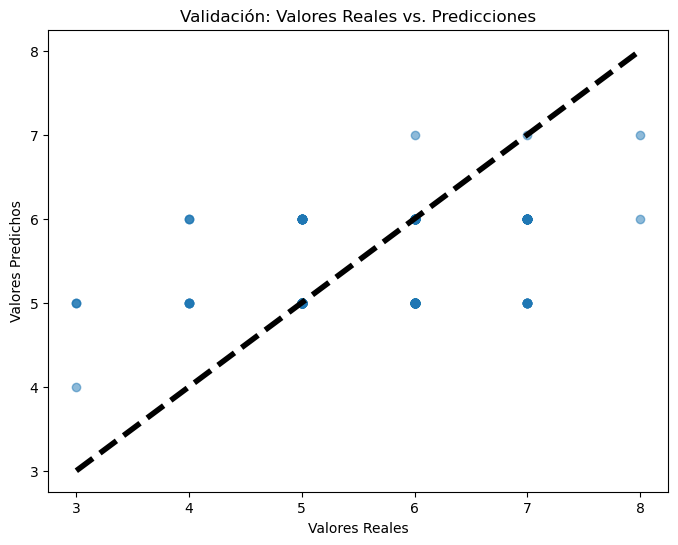

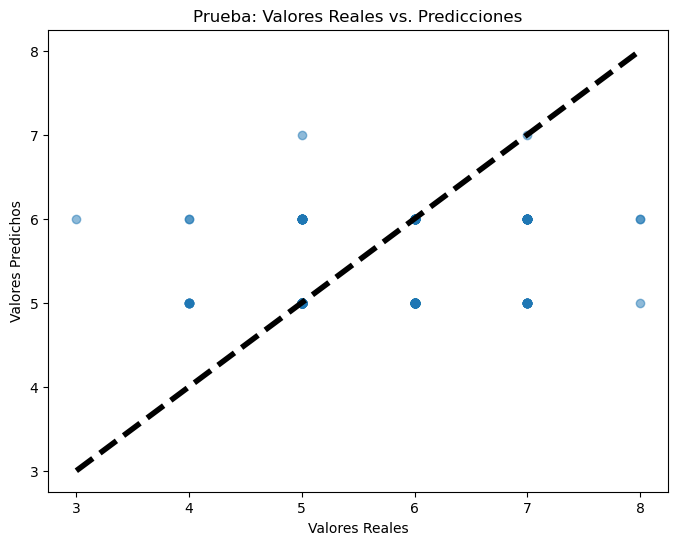

In [300]:


# Parámetros del algoritmo (posibles experimentos)
learning_rate = 0.0001
iterations = 100000
threshold = 0.001
theta = np.random.rand(len(feature_names) + 1, 1)  # +1 por el término de intercepción

# Entrena el modelo
theta_optimal, _ = gradient_descent(train_data['X'], train_data['Y'], theta, learning_rate, iterations, threshold)

# Visualización del historial de costo
plt.figure(figsize=[8,6])
plt.plot(_,'r')  # '_' contiene el historial de costo
plt.grid(True)
plt.title('Convergencia de la Función de Costo')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.show()

# Cálculo del MSE para los conjuntos de datos
mse_train = calculate_mse(train_data['X'],train_data['Y'],theta_optimal)
mse_val = calculate_mse(val_data['X'],val_data['Y'],theta_optimal)
mse_test = calculate_mse(test_data['X'],test_data['Y'],theta_optimal)

# Impresión de resultados
print("MSE en entrenamiento:", mse_train)
print("MSE en validación:", mse_val)
print("MSE en prueba:", mse_test)

# Función para visualizar valores reales vs. predicciones
def plot_real_vs_predicted(X, y, theta, title='Valores Reales vs. Predicciones'):
    y_pred = X.dot(theta)
    y_pred = np.round(y_pred)
    plt.figure(figsize=[8,6])
    plt.scatter(y, y_pred, alpha=0.5)
    plt.title(title)
    plt.xlabel('Valores Reales')
    plt.ylabel('Valores Predichos')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    plt.show()

# Visualizar valores reales vs. predicciones para entrenamiento, validación y prueba
plot_real_vs_predicted(train_data['X'], train_data['Y'], theta_optimal, title='Entrenamiento: Valores Reales vs. Predicciones')
plot_real_vs_predicted(val_data['X'], val_data['Y'], theta_optimal, title='Validación: Valores Reales vs. Predicciones')
plot_real_vs_predicted(test_data['X'], test_data['Y'], theta_optimal, title='Prueba: Valores Reales vs. Predicciones')



In [301]:
y_pred = test_data['X'].dot(theta)
y_test = test_data['Y']

# Regresión logística

Funciones princiapales

In [302]:
# Función de activación sigmoidal
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Función de costo para regresión logística
def calculate_logistic_loss(X, y, theta):

    m = len(y)
    y_pred = sigmoid(X.dot(theta))
    # Agregar términos de regularización al costo y al gradiente
    
    #Sin regularización
    loss = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) 

    '''
    # Término de regularización L2
    regularization_term = (lambda_param / (2 * m)) * np.sum(theta[1:]**2)
    loss = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) + regularization_term
    '''
    '''
    # Término de regularización L1
    loss = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) 
    #reg_term = lambda_param * np.sum(np.abs(theta[1:]))
    #loss += reg_term
    '''
    return loss

# Gradiente descendente para regresión logística
def logistic_gradient_descent(X, y, theta, learning_rate, iterations, threshold):
    m = len(y)
    loss_history = np.zeros(iterations)

    for i in range(iterations):
        y_pred = sigmoid(X.dot(theta))
        errors = y_pred - y

        # Sin regularización 
        gradient = np.dot(X.transpose(), (errors)) / m
        
        '''
        # regularización L2
        #gradient = (np.dot(X.transpose(), (errors)) + lambda_param * np.vstack((0, theta[1:]))) / m
        '''
        '''
        # regularización L1
        #gradient = (X.transpose().dot(errors) + lambda_param * np.sign(theta)) / m
        '''
        theta -= learning_rate * gradient
        loss_history[i] = calculate_logistic_loss(X, y, theta)
        
        if i > 0 and abs(loss_history[i] - loss_history[i-1]) < threshold:
            print(f"Convergencia alcanzada en la iteración {i}.")
            break
    
    return theta, loss_history[:i+1]

def calculate_accuracy(X, y, theta):
    y_pred = sigmoid(X.dot(theta))
    y_pred_binary = np.round(y_pred)
    correct_predictions = np.sum(y_pred_binary == y)
    total_samples = len(y)
    accuracy = correct_predictions / total_samples
    return accuracy

Preparar datos

Binarización de datos de "quality" y conformacion de df

In [303]:
data['quality_binary'] = np.where(data['quality'] > 5, 1, 0)
print(data['quality_binary'])

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality_binary, Length: 1599, dtype: int64


In [304]:

print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Seleccion de variables independientes y dependiente

In [305]:
feature_names = ['alcohol', 'volatile acidity']
label_name = 'quality_binary'

Preparacion de matrices

In [306]:
# Uso 70% para entrenamiento (random split)
train_df= data.sample(frac=0.7,random_state=200)
rest_df= data.drop(train_df.index)
# Uso 15% para validacion y 15% para test
val_df=rest_df.sample(frac=0.5,random_state=200)
test_df=rest_df.drop(val_df.index)

# Preparar los datos de entrenamiento, validación y prueba
train_data = prepare_data(train_df, feature_names, label_name)
val_data = prepare_data(val_df, feature_names, label_name)
test_data = prepare_data(test_df, feature_names, label_name)

Ejecucion del modelo

Convergencia alcanzada en la iteración 1432.


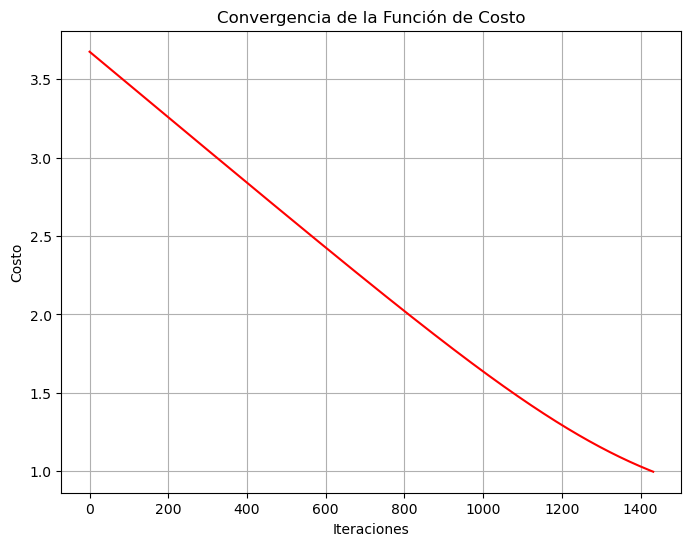

Precisión en el conjunto de entrenamiento: 53.98%
Precisión en el conjunto de validación: 54.58%
Precisión en el conjunto de prueba: 50.00%


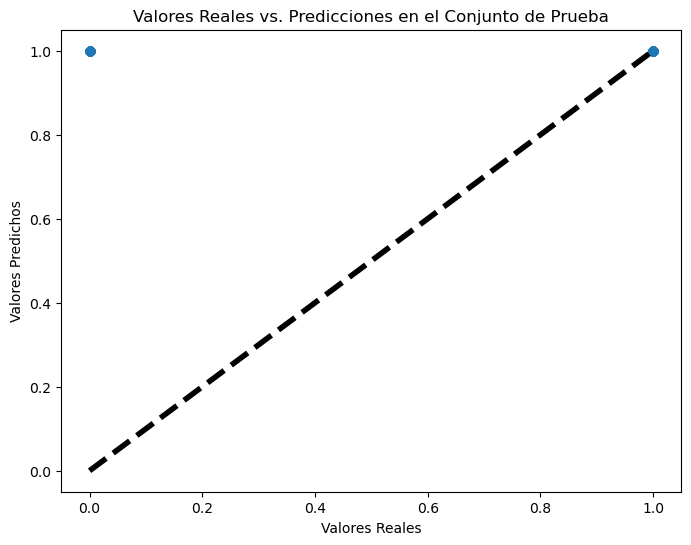

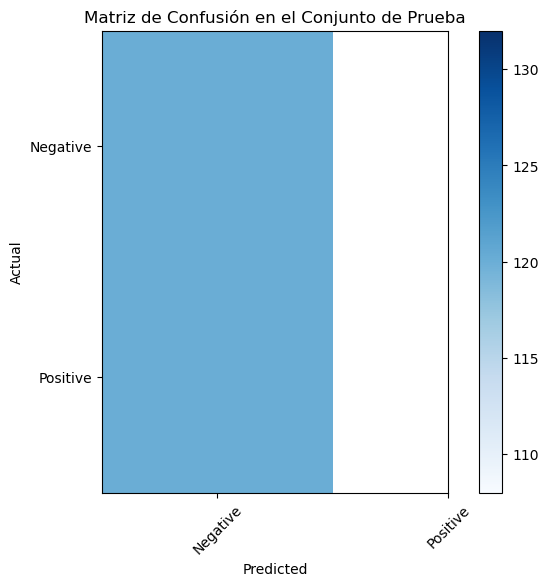

In [307]:
# Parámetros del algoritmo (posibles experimentos)
learning_rate =  0.0001 
iterations = 10000000
lambda_param = 0.01  # Puedes ajustar este valor
# Inicialización de los pesos
# theta = np.zeros(train_data['X'].shape[1]) 
theta = np.random.rand(len(feature_names) + 1, 1)

# Entrenar el modelo de regresión logística
theta_optimal, loss_history = logistic_gradient_descent(train_data['X'], train_data['Y'], theta, learning_rate, iterations, threshold)

# Visualización del historial de costo
plt.figure(figsize=[8, 6])
plt.plot(loss_history, 'r')
plt.grid(True)
plt.title('Convergencia de la Función de Costo')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.show()

# Evaluar el modelo en los conjuntos de entrenamiento, validación y prueba
accuracy_train = calculate_accuracy(train_data['X'], train_data['Y'], theta_optimal)
accuracy_val = calculate_accuracy(val_data['X'], val_data['Y'], theta_optimal)
accuracy_test = calculate_accuracy(test_data['X'], test_data['Y'], theta_optimal)

print(f'Precisión en el conjunto de entrenamiento: {accuracy_train:.2%}')
print(f'Precisión en el conjunto de validación: {accuracy_val:.2%}')
print(f'Precisión en el conjunto de prueba: {accuracy_test:.2%}')

# Obtener las predicciones en el conjunto de prueba
y_pred_test = sigmoid(test_data['X'].dot(theta_optimal))
y_pred_test =  np.round(y_pred_test)

# Graficar valores reales vs. predicciones para el conjunto de prueba
plt.figure(figsize=[8,6])
plt.scatter(test_data['Y'], y_pred_test, alpha=0.5)
plt.title('Valores Reales vs. Predicciones en el Conjunto de Prueba')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.plot([0, 1], [0, 1], 'k--', lw=4)  # Línea de referencia para una predicción perfecta
plt.show()

# Obtener las predicciones en el conjunto de prueba
y_pred_test_binary = np.round(y_pred_test)

# Calcular la matriz de confusión manualmente
conf_matrix = pd.crosstab(test_data['Y'].flatten(), y_pred_test_binary.flatten(), rownames=['Actual'], colnames=['Predicted'])

# Visualizar la matriz de confusión con matplotlib.pyplot
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión en el Conjunto de Prueba')
plt.colorbar()

classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
